# Introdução à análise forense por sistema de reconhecimento facial

Este notebook apresenta noções básicas sobre a utilização do pacote [`forensicface`](https://github.com/rafribeiro/forensicface) para comparação facial forense.

A análise é baseada na utilização de uma amostra da população de referência para obter escores de similaridade com o sistema de reconhecimento facial e obter duas distribuições de escores, cada uma relacionada às hipóteses de interesse do caso.  
Em geral, as hipóteses são:  
- "as imagens questionadas e padrões são de um mesmo indivíduo" e  
- "as imagens questionadas e padrões são de indivíduos distintos da população dereferência".

Assim, os escores de similaridade obtidos da amostra da população de referência são divididos em dois conjuntos. Um conjunto em que cada par de imagens comparadas tem origem num mesmo indivíduo e outro conjunto em que cada par de imagens comparadas tem origem em indivíduos distintos.

É fundamental que:  
- as imagens da amostra da população de referência tenham condições equivalentes às das imagens do caso (resolução, pose, iluminação, expressão facial, idade, grupo populacional, etc)
- as comparações realizadas com as imagens da amostra da população de referência sejam equivalentes à comparação das imagens do caso (ex. comparação de padrão com imagem frontal de excelente qualidade com imagem questionada de CFTV de baixa qualidade, não frontal e com iluminação não uniforme). É necessário que as comparações feitas com a amostra da população de referência também sejam feitas com o mesmo tipo de "descasamento" de condições.




## Importação do módulo e instanciamento dos modelos

In [2]:
from forensicface.app import ForensicFace

### Instanciamento do modelo com configurações mínimas

- uso da primeira GPU, se disponível (`use_gpu = True` e `gpu = 0`)
- tamanho da imagem para detecção = 320 x 320
- *não utilização* de modelos opcionais (`extended = False`).

In [3]:
ff = ForensicFace(model='sepaelv2', det_size=320, use_gpu=True, gpu=0, extended=False)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/jupyter-ramyses.rmr/.insightface/models/sepaelv2/1k3d68.onnx landmark_3d_68
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/jupyter-ramyses.rmr/.insightface/models/sepaelv2/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/jupyter-ramyses.rmr/.insightface/models/sepaelv2/genderage.onnx genderage
set det-size: (320, 320)


### Instanciamento do modelo com configurações padrão

- uso da primeira GPU, se disponível (`use_gpu = True` e `gpu = 0`)
- tamanho da imagem para detecção = 320 x 320
- utilização de modelos opcionais (`extended = True`): estimação de pose (ângulos pitch, yaw e roll), idade, sexo
- sem utilização de modelo para estimação de qualidade (norma magface) (`magface = False`)

In [4]:
ff = ForensicFace(model='sepaelv2', det_size=320, use_gpu=True, gpu=0, extended=True, magface=False)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/jupyter-ramyses.rmr/.insightface/models/sepaelv2/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/jupyter-ramyses.rmr/.insightface/models/sepaelv2/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/jupyter-ramyses.rmr/.insightface/models/sepaelv2/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
set det-size: (320, 320)


### Instanciamento do modelo com todas as opções

- uso da primeira GPU, se disponível (`use_gpu = True` e `gpu = 0`)
- tamanho da imagem para detecção = 320 x 320
- utilização de modelos opcionais (`extended = True`): estimação de pose (ângulos pitch, yaw e roll), idade, sexo
- utilização de modelo para estimação de qualidade (norma magface) (`magface = True`)

In [5]:
ff = ForensicFace(model='sepaelv2', det_size=320, use_gpu=True, gpu=0, extended=True, magface=True)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/jupyter-ramyses.rmr/.insightface/models/sepaelv2/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/jupyter-ramyses.rmr/.insightface/models/sepaelv2/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/jupyter-ramyses.rmr/.insightface/models/sepaelv2/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
set det-size: (320, 320)


## Processamento básico de imagens

Composto pelas seguintes etapas:
1. Localização/detecção da face na imagem
2. Alinhamento a partir das coordenadas de olhos, nariz e cantos da boca
3. Passagem da imagem pelo modelo de reconhecimento e obtenção de representação vetorial da face, com 512 dimensões.
4. Opcional: passagem da imagem pelos modelos de estimação de sexo, idade, pose (ângulos pitch, yaw e roll) e qualidade (magface)  

Pode ser feito através dos métodos `.process_image_single_face` e `.process_image_multiple_faces`. Ambos os métodos recebem como entrada apenas o caminho da imagem, ou a própria imagem lida previamente e com canais na ordem BGR.

É mais seguro sempre utilizar o método `.process_image_multiple_faces` e verificar se o retorno traz apenas uma face. Recomenda-se somente usar o método `.process_image_single_face` se tiver certeza de que a imagem possui apenas uma face.

dict_keys(['keypoints', 'ipd', 'embedding', 'norm', 'bbox', 'aligned_face', 'gender', 'age', 'pitch', 'yaw', 'roll', 'magface_embedding', 'magface_norm', 'fiqa_score'])
dict_keys(['keypoints', 'ipd', 'embedding', 'norm', 'bbox', 'aligned_face', 'gender', 'age', 'pitch', 'yaw', 'roll', 'magface_embedding', 'magface_norm', 'fiqa_score'])


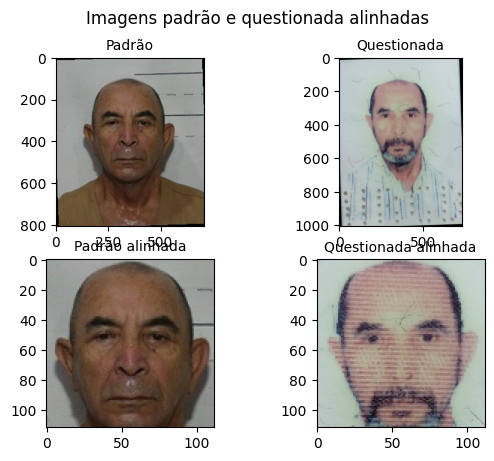

In [6]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2

#paths para imagens Padrão e Questionada
str_pathP = "padrao.jpg"
str_pathQ = "Questionada.jpg"

# objetos
imagePa = Image.open(str_pathP)
imageQa = Image.open(str_pathQ)
imageP = cv2.imread(str_pathP)
imageQ = cv2.imread(str_pathQ)

resultado1 = ff.process_image_multiple_faces(str_pathP)
resultado2 = ff.process_image_multiple_faces(str_pathQ)

if len(resultado1) == 1:
    print(resultado1[0].keys())
else:
    print("revise a imagem padrão")
    plt.imshow(imageP)
    
if len(resultado2) == 1:
        print(resultado2[0].keys())
else:
    print("revise a imagem questionada")
    plt.imshow(imageQ)
    

fig, axs = plt.subplots(2,2)
fig.suptitle('Imagens padrão e questionada alinhadas')
plt.subplot(2,2,1)
plt.title('Padrão', fontsize=10)
plt.imshow(imagePa)            
plt.subplot(2,2,2)  
plt.title('Questionada', fontsize=10)       
plt.imshow(imageQa)
plt.subplot(2,2,3)
plt.title('Padrão alinhada', fontsize=10)
plt.imshow(resultado1[0]["aligned_face"])
plt.subplot(2,2,4)
plt.title('Questionada alinhada', fontsize=10)
plt.imshow(resultado2[0]["aligned_face"])

plt.show()  # display it

O resultado do processamento apresenta, para cada face:
- **keypoints**: os pontos das coordenadas de olhos, nariz e cantos da boca,
- **ipd**: a distância entre os centros dos olhos (_inter pupillary distance_),
- **embedding**: a representação vetorial da face, com 512 dimensões,
- **norm**: a norma do vetor de representação da face,
- **bbox**: as coordenadas do retângulo que localiza a face detectada. ATENÇÃO: a entrada para o modelo de reconhecimento não é a região delimitada por essas coordenadas.
- **aligned_face**: face alinhada e transformada a partir dos keypoints e redimensionada para 112x112 pixels. Esta é a imagem utilizada como entrada para o modelo de reconhecimento e da qual é extraída a embedding.
- **gender**, **age**, **pitch**, **yaw** e **roll**: estimativas de sexo, idade, e ângulos de rotação da face, respectivamente. O processamento para estimar essas informações pode ser desabilitado instanciando o forensicface com a flag `extended = False`
- **magface_embedding** e **magface_norm**: representação vetorial e norma dessa representação obtidas pelo modelo magface. A norma dessa representação teria correlação com a qualidade da imagem. Utilize com cautela, pois ainda não foi testado.

In [7]:
resultado1[0]["embedding"], resultado2[0]["embedding"]

(array([ 0.5985133 ,  0.20991522,  1.1488336 ,  0.7668381 ,  0.25201097,
         0.26176763,  0.64972454, -0.03054603,  2.0005338 ,  0.45376074,
         1.0771744 , -1.315955  ,  0.10837032, -1.7859621 ,  0.84021294,
         0.2650257 , -0.09433567,  0.11829045, -0.13375323,  0.04484986,
         0.04659266,  0.1990755 , -0.22808897, -1.378074  ,  0.8414241 ,
        -0.95350724,  0.09833289, -0.0608487 ,  0.77435714, -1.4820737 ,
         0.40528342, -0.28781646,  0.20114951, -0.71396196, -1.3048863 ,
         0.36091897, -1.2862258 ,  0.3540585 ,  0.13236015,  0.5054913 ,
         0.4841229 ,  1.3444512 , -0.6838676 ,  0.27738792, -1.7761619 ,
         0.24542807,  0.5289912 , -0.14947775,  0.8459312 ,  1.179377  ,
        -0.31021783,  2.1142633 ,  0.57583266,  0.39570352,  1.4284883 ,
         0.03533567, -0.3463191 , -1.895535  ,  0.15135811,  0.2670275 ,
         0.02719981, -0.09460222, -0.69241905, -0.9866086 , -0.07548247,
        -0.8042194 , -2.1915984 ,  0.2204976 ,  1.2

In [8]:
resultado1[0]["embedding"].shape, resultado2[0]["embedding"].shape

((512,), (512,))

In [9]:
resultado1[0]['keypoints'], resultado1[0]['ipd'], resultado2[0]['keypoints'], resultado2[0]['ipd'], 

(array([[268.2598 , 309.89096],
        [417.7591 , 309.15625],
        [344.22238, 398.87503],
        [287.1615 , 484.52405],
        [405.40182, 483.00833]], dtype=float32),
 149.5011,
 array([[280.71057, 338.9341 ],
        [433.90726, 337.94806],
        [360.37717, 425.3991 ],
        [304.1854 , 506.15204],
        [404.89737, 506.25864]], dtype=float32),
 153.19986)

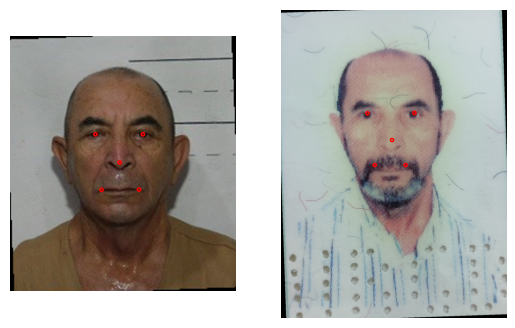

In [17]:
draw_imgP = imageP.copy()
draw_imgQ = imageQ.copy()
for kp in resultado1[0]['keypoints']:
    draw_imgP = cv2.circle(draw_imgP, center=kp.astype('int'), radius=5, thickness=3, color=(0,0,255))

for kp in resultado2[0]['keypoints']:
    draw_imgQ = cv2.circle(draw_imgQ, center=kp.astype('int'), radius=5, thickness=3, color=(0,0,255))

#plt.figure(1)
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(draw_imgP, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(draw_imgQ, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show();

## Comparação entre duas imagens

O escore de similaridade calculado pelo forensicface é a similaridade cosseno entre as embeddings das faces:  
  
$$ score = \frac{x_1 . x_2}{||x_1||\,||x_2||} $$  

É possível calcular o escore entre duas imagens faciais passando apenas os caminhos de cada uma para o método .compare:  
`ff.compare(path_to_image1,path_to_image2)`

Obs.: Utilizar este método com cautela em imagens que contenham mais de uma face.

In [12]:
# observar que não usa os processamentos anteriores, já que pega o path original da imagem. Verificar!
simil = ff.compare(str_pathP, str_pathQ)
print(f'\n\nO valor do escore de similaridade entre P e Q é: {simil}.')



O valor do escore de similaridade entre P e Q é: 0.5590696930885315.


## Obtenção de escores da amostra da população de referência

Neste exemplo utilizaremos como população de referência a base FEI1000_corrigida. Nesta base existem imagens com excelente qualidade, capturadas em condições controladas de pose, iluminação e expressão facial. Foi selecionado um subconjunto da base [FEI original](https://fei.edu.br/~cet/facedatabase.html), contendo apenas imagens em pose aproximadamente frontal. A figura abaixo mostra algumas imagens de exemplo:

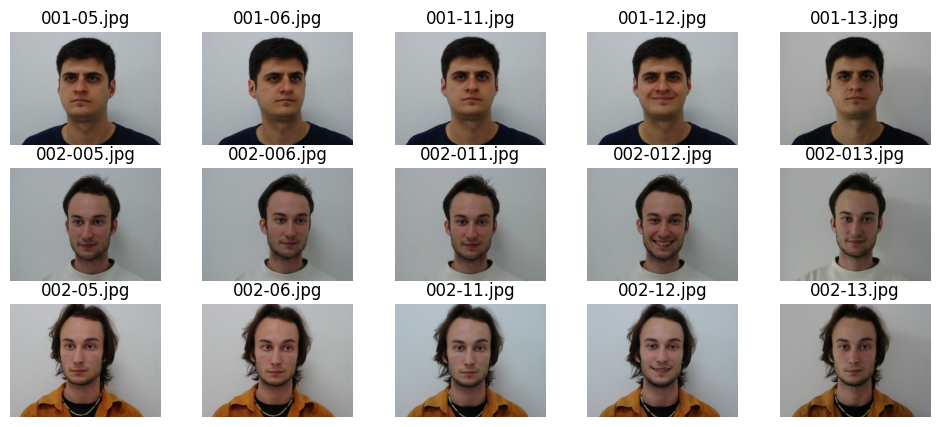

In [18]:
from glob import glob
import os

fei_images = glob("../../system_share/bases/fei1000_corrigida/imagens/*.jpg")
fei_images.sort()

fig, axs = plt.subplots(3,5, figsize=(12,5))
for imgpath, ax in zip(fei_images[:15],axs.flatten()):
    ax.imshow(Image.open(imgpath))
    ax.axis("off")
    ax.set_title(os.path.basename(imgpath))

Nesta base a informação de identidade está codificada nos três primeiros caracteres do nome do arquivo, ou seja, é possível obter a identidade associada a cada imagem com `os.path.basename(img_path)[:3]`

In [19]:
from tqdm.notebook import tqdm # para mostrar barra de progresso
d = []
for img_path in tqdm(fei_images):
    identity = os.path.basename(img_path)[:3]
    ret = ff.process_image_multiple_faces(img_path)
    if len(ret) == 1:
        embedding = ret[0]["embedding"]
        d.append({"imagem":os.path.basename(img_path), "identidade": identity, "embedding":embedding})

  0%|          | 0/1000 [00:00<?, ?it/s]

Criar um dataframe para visualização dos dados

In [20]:
import pandas as pd
df = pd.DataFrame(d)
df

,imagem,identidade,embedding
0,001-05.jpg,001,"[1.5912098, -0.29638666, -1.1077892, 1.6318843..."
1,001-06.jpg,001,"[1.9455053, -0.6524005, -1.4123304, 2.0291963,..."
2,001-11.jpg,001,"[1.808471, -0.25192475, -1.4248906, 1.8100086,..."
3,001-12.jpg,001,"[1.9567221, -0.7972027, -1.1437048, 1.5194476,..."
4,001-13.jpg,001,"[1.9026291, -0.4402808, -1.4101733, 1.4723498,..."
...,...,...,...
995,200-05.jpg,200,"[0.4088682, -1.860616, 1.1507602, -0.0879797, ..."
996,200-06.jpg,200,"[0.22149576, -1.8320308, 0.9403965, -0.3035689..."
997,200-11.jpg,200,"[0.41114557, -1.8687398, 0.9639866, -0.3643035..."
998,200-12.jpg,200,"[0.61018777, -1.6388036, -0.052388526, -0.0213..."


Salvar o dataframe com embeddings

In [21]:
import pickle

#with open("fei1000_corrigida_sepaelv2.pkl","wb") as f:
#    pickle.dump(df,f)
with open("recursos/fei1000_corrigida_sepaelv2.pkl","rb") as f:
    df = pickle.load(f)
df

,imagem,identidade,embedding
0,001-05.jpg,001,"[1.5912098, -0.29638666, -1.1077892, 1.6318843..."
1,001-06.jpg,001,"[1.9455053, -0.6524005, -1.4123304, 2.0291963,..."
2,001-11.jpg,001,"[1.808471, -0.25192475, -1.4248906, 1.8100086,..."
3,001-12.jpg,001,"[1.9567221, -0.7972027, -1.1437048, 1.5194476,..."
4,001-13.jpg,001,"[1.9026291, -0.4402808, -1.4101733, 1.4723498,..."
...,...,...,...
995,200-05.jpg,200,"[0.4088682, -1.860616, 1.1507602, -0.0879797, ..."
996,200-06.jpg,200,"[0.22149576, -1.8320308, 0.9403965, -0.3035689..."
997,200-11.jpg,200,"[0.41114557, -1.8687398, 0.9639866, -0.3643035..."
998,200-12.jpg,200,"[0.61018777, -1.6388036, -0.052388526, -0.0213..."


Cálculos dos escores e visualização das distribuições de escores de mesma pessoa (SS - same source) e de pessoas diferentes (DS - different source)

In [22]:
from numba import jit
from tqdm.notebook import tqdm # para mostrar barra de progresso
import numpy as np
from itertools import combinations
import pandas as pd


@jit(nopython=True)
def cosine(x,y):
    return np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))


comb = combinations(list(df.index),2)
scores = []
for idx1, idx2 in tqdm(list(comb)): # essa é uma maneira muito ineficiente para cálculo dos escores
    img1, id1, x1 = df.loc[idx1]
    img2, id2, x2 = df.loc[idx2]
    
    score = cosine(x1,x2)
    
    scores.append({'imagem1':img1, 'imagem2':img2, 'score':score, 'y':int(id1==id2)})
scores = pd.DataFrame(scores)
scores

  0%|          | 0/499500 [00:00<?, ?it/s]

,imagem1,imagem2,score,y
0,001-05.jpg,001-06.jpg,0.928115,1
1,001-05.jpg,001-11.jpg,0.971726,1
2,001-05.jpg,001-12.jpg,0.935434,1
3,001-05.jpg,001-13.jpg,0.940358,1
4,001-05.jpg,002-005.jpg,0.108725,0
...,...,...,...,...
499495,200-06.jpg,200-12.jpg,0.814195,1
499496,200-06.jpg,200-13.jpg,0.929092,1
499497,200-11.jpg,200-12.jpg,0.816387,1
499498,200-11.jpg,200-13.jpg,0.934072,1


<Axes: xlabel='score', ylabel='Density'>

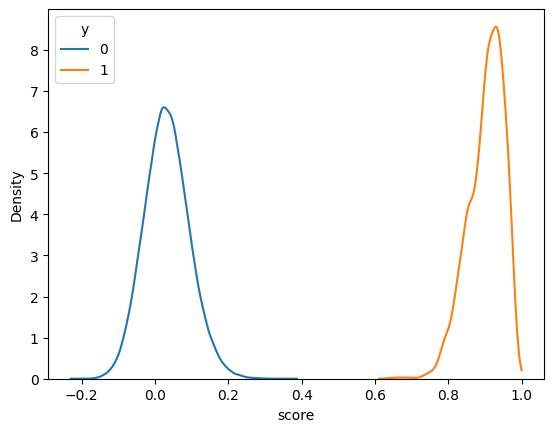

In [23]:
import seaborn as sns

sns.kdeplot(data=scores, x='score', hue='y',common_norm=False,clip=(-1,1))

## Simulando um caso bem modelado pela base FEI1000_corrigida

- excelente qualidade
- pose aproximadamente frontal
- expressão facial neutra
- iluminação controlada
- mesma sessão

Condições que muuuuuito dificilmente encontraremos em casos reais

Text(0.5, 1.0, 'padrao')

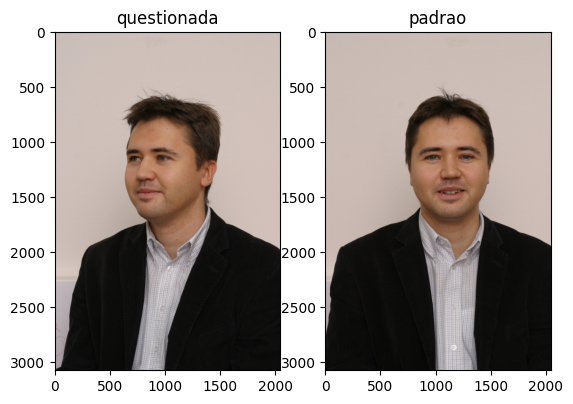

In [16]:
questionada = "recursos/001_L1.jpg"
padrao = "recursos/001_frontal.jpg"
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(Image.open(questionada))
ax1.set_title("questionada")
ax2.imshow(Image.open(padrao))
ax2.set_title("padrao")

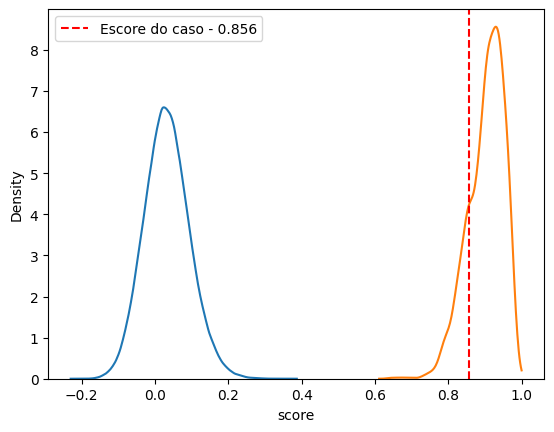

In [17]:
escore_caso = ff.compare(questionada,padrao)

graph = sns.kdeplot(data=scores, x='score', hue='y',common_norm=False,clip=(-1,1))
graph.axvline(escore_caso, c='r', linestyle='dashed', label=f'Escore do caso - {escore_caso:.3f}')
plt.legend()
plt.show()

Conclusão baseada em avaliação qualitativa do escore no contexto da base de referência? +2? +3?


### Cálculo de LR

A seguir veremos como calcular o valor da LR utilizando regressão logística regularizada (ref. [Morrison, 2013](https://arxiv.org/abs/2104.08846)). Embora este modelo não calcule explicitamente probabilidades da evidência condicionadas a cada hipótese, é importante ter em mente a definição formal da LR considenrando o escore como evidência: $$ LR = \frac{P(E|H_p)}{P(E|H_d)}$$  

Considenrando que o escore $s$ é a evidência, $$ LR = \frac{P(s|H_p)}{P(s|H_d)} $$  

Obs.: Existem métodos para calcular a LR em que obtemos o numerador e o denominador das fórmulas acima de maneira explícita, estimando funções densidade de probabilidade para cada conjunto de escores (que modelam as hipóteses de interesse) e dividindo o valor de cada função avaliada no escore do caso.

In [18]:
import lir

In [ ]:
calib = lir.LogitCalibrator(C=100.)
calib.fit(scores.score.to_numpy(), scores.y.to_numpy())

In [ ]:
from math import e

x = np.linspace(-0.3, 1., num=100, endpoint=True)

lr = calib.transform(np.array([escore_caso]))
logit = 1/(1+e**-(x*calib._logit.coef_[0][0] + calib._logit.intercept_[0]))

plt.plot(x,logit)
plt.vlines(escore_caso, ymin=-0.01, ymax=1.01, color='r', linestyle='dashed', label=f'log10 LR = {np.log10(lr[0]):.2f}')
plt.legend()

Observações: A LR calculada acima é especialmente sensível ao parâmetro de regularização escolhido. O valor escolhido (C=100) essencialmente garante a estabilidade numérica do modelo de regressão logística utilizado. Valores menores de C induzem a um encolhimento da magniture do log(LR), sendo equivalente a adotar uma conclusão mais conservadora na conclusão do exame (ref. [Morrison and Poh, 2018](https://doi.org/10.1016/j.scijus.2017.12.005)). 

In [ ]:
calib = lir.LogitCalibrator(C=1.)
calib.fit(scores.score.to_numpy(), scores.y.to_numpy())

In [ ]:
from math import e

x = np.linspace(-0.3, 1., num=100, endpoint=True)

lr = calib.transform(np.array([escore_caso]))
logit = 1/(1+e**-(x*calib._logit.coef_[0][0] + calib._logit.intercept_[0]))

plt.plot(x,logit)
plt.vlines(escore_caso, ymin=-0.01, ymax=1.01, color='r', linestyle='dashed', label=f'log10 LR = {np.log10(lr[0]):.2f}')
plt.legend()

## Simulando um caso **mal** modelado pela base FEI1000_corrigida

- padrão de excelente qualidade e questionado de baixa qualidade, CFTV de baixa resolução


(-0.5, 2047.5, 3071.5, -0.5)

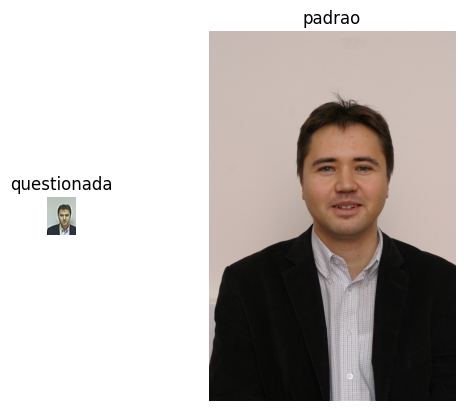

In [20]:
questionada = "recursos/001_cam1_1.jpg"
padrao = "recursos/001_frontal.jpg"
fig, (ax1,ax2) = plt.subplots(1,2, width_ratios=(1,15)) # Obs: a imagem questionada é proporcionalmente ainda menor!
ax1.imshow(Image.open(questionada))
ax1.set_title("questionada")
ax1.axis('off')
ax2.imshow(Image.open(padrao))
ax2.set_title("padrao")
ax2.axis('off')

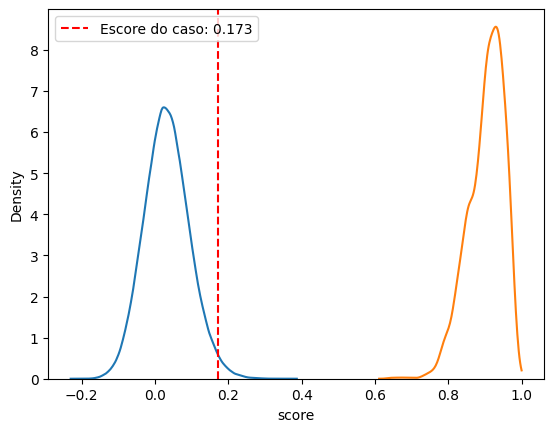

In [21]:
escore_caso = ff.compare(questionada,padrao)

graph = sns.kdeplot(data=scores, x='score', hue='y',common_norm=False,clip=(-1,1))
graph.axvline(escore_caso, c='r', linestyle='dashed', label=f'Escore do caso: {escore_caso:.3f}')
plt.legend()
plt.show()

Resultado baseado na avaliação qualitativa do gráfico? -1? -2? 

In [ ]:
from math import e

x = np.linspace(-0.3, 1., num=100, endpoint=True)

lr = calib.transform(np.array([escore_caso]))
logit = 1/(1+e**-(x*calib._logit.coef_[0][0] + calib._logit.intercept_[0]))

plt.plot(x,logit)
plt.vlines(escore_caso, ymin=-0.01, ymax=1.01, color='r', linestyle='dashed', label=f'log10 LR = {np.log10(lr[0]):.2f}')
plt.legend()

**A utilização de amostra da população de referência que não modele adequadamente as condições do caso provocará interpretações equivocadas!**

## Utilização de base de referência que modele adequadamente o caso anterior

- Comparações entre padrão de excelente qualidade e imagens de CFTV de baixa qualidade

In [22]:
with open("../../system_share/bases/scface/scface_mugshots_cropped_adaface_magface_sepaelv2.pkl","rb") as f:
    mugs = pickle.load(f)
with open("../../system_share/bases/scface/scface_surveillance_adaface_magface_sepaelv2.pkl","rb") as f:
    surv = pickle.load(f)
mugs = mugs.loc[mugs.identity!='001']
surv = surv.loc[surv.identity!='001']
surv = surv.loc[surv.distance=='1']
mugs

,identity,pitch,roll,yaw,gender,age,ipd,adaface_norm,adaface_features,magface_norm,magface_features
002_frontal.JPG,002,6.369215,-0.064827,3.334326,M,40,269.565674,21.459066,"[1.3380344, 2.2563214, -1.8246189, -0.3844104,...",22.776480,"[0.16542214, 1.5291573, 0.085053034, 1.1539687..."
003_frontal.JPG,003,4.930624,-0.782988,2.558858,M,41,283.338745,16.157963,"[1.249914, -0.53723806, -0.33573362, -0.946026...",22.551422,"[0.8411639, -0.4693466, 0.51460767, 0.9025219,..."
004_frontal.JPG,004,-7.163692,2.024645,1.111671,M,37,286.004944,15.368437,"[-0.37747648, -0.11808144, -0.32787508, -0.643...",23.896080,"[1.1620054, 0.04858328, -1.233887, 2.1426444, ..."
005_frontal.JPG,005,-11.194934,-3.921657,15.552019,M,33,291.446716,15.417899,"[1.7886823, -0.22787303, 0.15222614, 0.4445238...",23.627392,"[1.2685229, -0.9815032, -0.4749358, 0.6130087,..."
006_frontal.JPG,006,-12.794569,0.746768,7.840380,M,37,315.044769,14.873380,"[-0.6410607, -0.32050666, -1.4846686, 0.026710...",23.620262,"[-0.79875886, -1.3061149, -0.96364135, 0.69077..."
...,...,...,...,...,...,...,...,...,...,...,...
126_frontal.JPG,126,-5.712132,-0.576591,3.101172,M,38,334.392395,16.593298,"[0.99594635, -0.10125077, -0.46152112, -0.1584...",24.004465,"[0.012953168, -1.1079664, 0.5780033, -0.557545..."
127_frontal.JPG,127,-1.938218,-2.378556,5.608988,M,40,338.960052,15.671474,"[-0.4588345, -0.43341917, -0.13029979, 0.28329...",24.642498,"[-0.3910083, -0.8358214, 1.2932309, 1.7114924,..."
128_frontal.JPG,128,-1.470744,7.154417,4.286486,M,30,356.351410,14.885805,"[0.40158713, 1.5184343, 0.17810905, -0.2310867...",27.562256,"[0.82526165, -1.074885, -2.4756675, -1.9244308..."
129_frontal.JPG,129,-2.810244,-4.278094,-0.382598,M,40,348.237946,18.170744,"[0.55626625, 0.6492231, 0.21165554, -0.8708718...",27.743633,"[0.94181484, 1.3105108, 0.88585335, -0.6609003..."


In [ ]:
surv

In [23]:
ids_m = mugs.identity.to_numpy()
X_m = np.array(mugs.adaface_features.to_list())

ids_s = surv.identity.to_numpy()
X_s = np.array(surv.adaface_features.to_list())
X_m.shape, X_s.shape, ids_m.shape, ids_s.shape

((129, 512), (645, 512), (129,), (645,))

In [24]:
def cosine_vet(X,Y): # essa é a maneira mais eficiente de cálculo de escores
    X = X/np.linalg.norm(X, axis=1, keepdims=True)
    Y = Y/np.linalg.norm(Y, axis=1, keepdims=True)
    
    dot_product = np.dot(X,Y.T)
    
    return dot_product

escores = cosine_vet(X_m, X_s)

same_id_mask = ids_m[:,np.newaxis] == ids_s

ss = escores[same_id_mask]

ds = escores[~same_id_mask]



len(ss), ds.shape, escores.shape,

(645, (82560,), (129, 645))

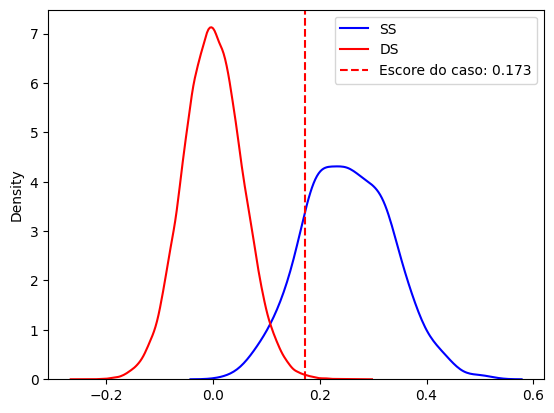

In [25]:
escore_caso = ff.compare(questionada,padrao)

graph = sns.kdeplot(ss, color='blue', label='SS')
sns.kdeplot(ds, color='red', label='DS')
graph.axvline(escore_caso, c='r', linestyle='dashed', label=f'Escore do caso: {escore_caso:.3f}')
plt.legend()
plt.show()

Avaliação qualitativa do resultado acima? +1? +2?

In [ ]:
scores, y = lir.util.Xn_to_Xy(ds,ss)
calib.fit(scores,y)

x = np.linspace(-0.3, 1., num=100, endpoint=True)

lr = calib.transform(np.array([escore_caso]))
logit = 1/(1+e**-(x*calib._logit.coef_[0][0] + calib._logit.intercept_[0]))

plt.plot(x,logit)
plt.vlines(escore_caso, ymin=-0.01, ymax=1.01, color='r', linestyle='dashed', label=f'log10 LR = {np.log10(lr[0]):.2f}')
plt.legend()

Conclusão: 